<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 10px;">

# 1.3 - Intro to Web Scraping

---

Week 4 - 1.3

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Understand scraping basics
- Familiarity with import.io service
- XPath basics

### STUDENT PRE-WORK
*Before this lesson, you should already be able to:*
- Understand basic HTML concepts
- Worked with Beautiful Soup
- Signed up for import.io

### LESSON GUIDE
| TIMING  | TYPE  | TOPIC  |
|:-:|---|---|
| 5 min  | [Opening](#opening)  | Overview of what scraping is/does |
| 10 min  | [Introduction](#introduction)   | Explain what scraping is |
| 15 min  | [Demo](#demo)  | Python Library BeautifulSoup |
| 25 min  | [Guided Practice](#guided-practice)  | Import.io |
| 25 min  | [Independent Practice](#ind-practice)  | Import.io  |
| 5 min  | [Conclusion](#conclusion)  |  How it works with Import.IO |

---

## Introduction: Scraping Overview (10 mins)

Web scraping is a technique of extracting information from websites. It focuses on transformation of unstructured data on the web, into structured data that can be stored and analyzed.

There are a variety of ways to "scrape" what we want from the web:

- 3rd Party Services (import.io)
- Write our own Python apps that pull HTML documents and parse them
  - Mechanize
  - Scrapy
  - Requests
  - libxml / XPath
  - Regular expressions

## (3 mins) What is hardest to understand about scraping?
_ie: If you were asked to scrape craigslist property listings and put them in a DataFrame(), what would hold you up?_

## HTML Review

In the HTML DOM (Document Object Model), everything is a node:
 * The document itself is a document node.
 * All HTML elements are element nodes.
 * All HTML attributes are attribute nodes.
 * Text inside HTML elements are text nodes.
 * Comments are comment nodes.

## Elements
Elements begin and end with **open and close "tags"**, which are defined by namespaced, encapsulated strings. 

```html
<title>I am a title.</title>
<p>I am a paragraph.</p>
<strong>I am bold.</strong>
```

_note: the tags **title, p, and strong** are represented here._

## Element Parent / Child Relationships

<img src="http://www.htmlgoodies.com/img/2007/06/flowChart2.gif" width="250">

**Elements begin and end in the same namespace like so:**  `<p></p>`

**Elements can have parents and children:**

```html
<body>
    <div>I am inside the parent element
        <div>I am inside a child element</div>
        <div>I am inside another child element</div>
        <div>I am inside yet another child element</div>
    </div>
</body>
```

## Element Attributes

Elements can also have attributes!  Attributes are defined inside **element tags** and can contain data that may be useful to scrape.

```html
<a href="http://lmgtfy.com/?q=html+element+attributes" title="A title" id="web-link" name="hal">A Simple Link</a>
```

The **element attributes** of this `<a>` tag element are:
- id
- href
- title
- name

This `<a>` tag example will render in your browser like this:
> <a href="https://www.youtube.com/watch?v=dQw4w9WgXcQ">A Simple Link</a>


## (3 mins) Can you identify an attribute, an element, a text item, and a child element?

```HTML
<html>
   <title id="main-title">All this scraping is making me itch!</title>
   <body>
       <h1>Welcome to my Homepage</h1>
       <p id="welcome-paragraph" class="strong-paragraph">
           <span>Hello friends, let me tell you about this cool hair product..</span>
           <ul>
              <li>It's cool</li>
              <li>It's fresh</li>
              <li>It can tell the future</li>
              <li>Always be closing</li>
           </ul>
       </p>
   </body>
```

**Bonus: What's missing?** 

## Enter XPath

XPath uses path expressions to select nodes or node-sets in an HTML/XML document. These path expressions look very much like the expressions you see when you work with a traditional computer file system.

## XPath Features

XPath includes over 100 built-in functions to help us select and manipulate HTML (or XML) documents. XPath has functions for:

- string values
- numeric values
- date and time comparison
- sequence manipulation
- Boolean values
- and more!

## Basic XPath Expressions

XPath comes with a wide array of features but the basics of selecting data are the most common problems that XPath can help you solve.

The most common task you'll use **XPath** for is selecting data from HTML documents.  There are two ways you can **select elements** within HTML using **XPath**:

- Absolute reference
- Relative reference

# XPath:  Absolute References

_For our XPath demonstration, we will use Scrapy, which is using libxml under the hood.  Libxml provides the basic functionality for XPath expressions._

In [1]:
# pip install scrapy
# pip install --upgrade zope2
from scrapy.selector import Selector
from scrapy.http import HtmlResponse

HTML = """
<html>
    <body>
        <span id="only-span">good</span>
    </body>
</html>
"""
# The same thing but "absolute" reference
Selector(text=HTML).xpath('/html/body/span/text()').extract()


[u'good']

## Relative Reference

Relative references in XPath match the "ends" of structures.  Since there is only a single "span" element, `//span/text()` matches **one element**.

In [ ]:
Selector(text=HTML).xpath('//span/text()').extract()

## Selecting Attributes

Attributes **within a tag**, such as `id="only-span"` within our span attribute.  We can get the attribute by using `@` symbol **after** the **element reference**.


In [78]:
Selector(text=HTML).xpath('//span/@id').extract()

[u'only-span']

## (~10 mins) Where's Waldo - "XPath Edition"

In this example, we will find Waldo together.  Find Waldo as:

- Element
- Attribute
- Text element

In [88]:
HTML = """
<html>
    <body>
        
        <ul id="waldo">
            <li class="waldo">Name:  Waldo</li>
            <li class="waldo">Height:  ???</li>
            <li class="waldo">Weight:  ???</li>
            <li class="waldo">Last Location:  ???</li>
        </ul>
        
        <waldo>Waldo</waldo>
    </body>
</html>
"""

In [99]:
# Find absolute element
#Selector(text=HTML).xpath('/html/body/waldo/text()').extract()
# Selector(text=HTML).xpath('/html/body/ul/li/text()').extract()

# Find relative element
# Selector(text=HTML).xpath('//li').extract()

# Find element attribute
# Selector(text=HTML).xpath('////@class').extract()
# Selector(text=HTML).xpath('//ul/@id').extract()


# Find element text
# Selector(text=HTML).xpath('').extract()

[u'waldo']

## 1 vs N Selections

When selecting elements via relative reference, it's possible that you will select multiple items.  It's still possible to select single items, if you're specfic enough.

**Singular Reference**
- **Index** starts at **1**
- Selections by offset
- Selections by "first" or "last"
- Selections by **unique attribute value**


In [136]:
HTML = """
<html>
    <body>
    
        <!-- Search Results -->
        <div class="search-result">
           <a href="https://www.youtube.com/watch?v=751hUX_q0Do" title="Rappin with Gas">Rapping with gas</a>
           <span class="link-details">This is a great video about gas.</span>
        </div>
        <div class="search-result">
           <a href="https://www.youtube.com/watch?v=97byWqi-zsI" title="Casio Rapmap">The Rapmaster</a>
           <span class="link-details">My first synth ever.</span>
        </div>
        <div class="search-result">
           <a href="https://www.youtube.com/watch?v=TSwqnR327fk" title="Cinco Products">Cinco Midi Organizer</a>
           <span class="link-details">Midi files at the speed of light.</span>
        </div>
        <div class="search-result">
           <a href="https://www.youtube.com/watch?v=8TCxE0bWQeQ" title="Baddest Gates">BBG Baddest Moments</a>
           <span class="link-details">It's tough to be a gangster.</span>
        </div>
        
        <!-- Page stats -->
        <div class="page-stats-container">
            <li class="item" id="pageviews">1,333,443</li>
            <li class="item" id="last-viewed">01-22-2016</li>
            <li class="item" id="views-per-hour">1,532</li>
            <li class="item" id="kiefer-views-per-hour">5,233.42</li>
        </div>
        
    </body>
</html>
"""

#### Selecting the first element in a series of elements

In [112]:
Selector(text=HTML).xpath('//span[4]').extract()

[u'<span class="link-details">It\'s tough to be a gangster.</span>']

#### Selecting the last element in a series of elements

In [109]:
Selector(text=HTML).xpath('//span[last()]').extract()

[u'<span class="link-details">It\'s tough to be a gangster.</span>']

#### Selecting all elements matching a selection

In [110]:
Selector(text=HTML).xpath('//span').extract()

[u'<span class="link-details">This is a great video about gas.</span>',
 u'<span class="link-details">My first synth ever.</span>',
 u'<span class="link-details">Midi files at the speed of light.</span>',
 u'<span class="link-details">It\'s tough to be a gangster.</span>']

#### Selecting elements matching an _attribute_

This will be one of the most common ways you will select items.  HTML DOM elements will be more differentiated based on their "class" and "id" variables.  Mainly, these types of attributes are used by web developers to refer to specfic elements or a broad set of elements to apply visual characteristics using CSS.

```HTML 
//element[@attribute="value"]
```

**Generally**

- "class" attributes within elements usually refer to multiple items
- "id" attributes are supposed to be unique, but not always

_CSS stands for cascading style sheets.  These are used to abstract the definition of visual elements on a micro and macro scale for the web.  They are also our best friend as data miners.  They give us strong hints and cues as to how a web document is structured._

In [133]:
Selector(text=HTML).xpath('//div[@class="page-stats-container"]/li[@id="pageviews"][@class = "item"]').extract()

[u'<li class="item" id="pageviews">1,333,443</li>']

## Let's Code:

 - How can we get a series of only text items for the page statistics section of our page?
 - We want to know only how many times Kiefer views my Youtube videos page per hour?

In [122]:
# Get all text elements for the page statistics section
Selector(text=HTML).xpath('//li[@id]').extract()

[u'<li class="item" id="pageviews">1,333,443</li>',
 u'<li class="item" id="last-viewed">01-22-2016</li>',
 u'<li class="item" id="views-per-hour">1,532</li>',
 u'<li class="item" id="kiefer-views-per-hour">5,233.42</li>',
 u'<li class="item2" id="pageviews">1,333,443 - 2</li>',
 u'<li class="item2" id="last-viewed">01-22-2016 - 2</li>',
 u'<li class="item2" id="views-per-hour">1,532 - 2</li>',
 u'<li class="item2" id="kiefer-views-per-hour">5,233.42 - 2</li>']

In [139]:
# Get only the text for "Kiefer's" number of views per hour
# Selector(text=HTML).xpath('//div[@class="page-stats-container"]/li[4]/text()').extract()

# Get only the text for "Kiefer's" number of views per hour
Selector(text=HTML).xpath('//li[@id="kiefer-views-per-hour"]/text()').extract()

[u'5,233.42']

## A Quick Note:  Requests

The requests module is the gateway to interacting with the web using Python.  We can:

 - Fetch web documents as strings
 - Decode JSON
 - Basic data munging with Web Documents
 - Download static files that are not text
  - Images
  - Videos
  - Binary data


Take some time and read up on Requests:

http://docs.python-requests.org/en/master/user/quickstart/

## Let's Scrape Data Tau Headlines

DataTau is a great site for data science news. Let's take their headlines using Python **requests**, and practice selecting various elements.

Using <a href="https://chrome.google.com/webstore/detail/xpath-helper/hgimnogjllphhhkhlmebbmlgjoejdpjl?hl=en">XPath helper Chrome plugin</a> _(cmd-shift-x)_ and the Chrome "inspect" feature, let's explore the structure of the page.

_Here's a <a href="https://www.youtube.com/watch?v=i2Li1vnv09U">concise video</a> that demonstrates the basic inspect feature within Chrome._

In [102]:
# Please only run this frame once to avoid hitting the site too hard all at once
import requests

response = requests.get("http://www.datatau.com")
HTML = response.text  
HTML[0:500]           # view the first 500 characters of the HTML index document for DataTau

u'<html><head><link rel="stylesheet" type="text/css" href="news.css">\n<link rel="shortcut icon" href="http://www.iconj.com/ico/d/x/dxo02ap56v.ico">\n<script>\nfunction byId(id) {\n  return document.getElementById(id);\n}\n\nfunction vote(node) {\n  var v = node.id.split(/_/);   // {\'up\', \'123\'}\n  var item = v[1]; \n\n  // adjust score\n  var score = byId(\'score_\' + item);\n  var newscore = parseInt(score.innerHTML) + (v[0] == \'up\' ? 1 : -1);\n  score.innerHTML = newscore + (newscore == 1 ? \' point\' : \' points'

#### Selecting Only The Headlines

We will use the XPath helper tool to inspect the markup that comprises the **title** to find any pattern.  Since there are more than one **titles**, we expect to find a series of elements representing the **title** data that we are interested in.

![](https://snag.gy/m4K3UE.jpg)

In this example, we are referencing the the **1st center**, **3rd table row (`tr[3]`)**, within the 2nd **td having a class of "title" (`td[@class="title"][2]`)**, and the anchor tag within a **(`a/text()`)**.


In [3]:
titles = Selector(text=HTML).xpath('//td[@class="title"]/a/text()').extract()
titles[0:5] # the first 5 titles

[u'Interpreting flight queries using CRFs and word embeddings',
 u'The Receiver Operating Characteristic (ROC) Explained',
 u'How to Build Your Distributed Database',
 u'How I got into the top 15 of a Kaggle competition in 3 days',
 u'1.1 Billion Taxi Trips on a 50-node Dataproc Cluster']

## How do we get the urls from the titles?

In [4]:
urls = Selector(text=HTML).xpath('//td[@class="title"]/a/@href').extract()
urls[0:5]
#<a href="http://tech.marksblogg.com/faster-queries-google-cloud-dataproc.html">33x Faster Queries on Google Cloud's Dataproc using Facebook's Presto</a>
# titles[0:5] # the first 5 titles

[u'http://www.angel.ai',
 u'https://lettier.github.io/posts/2016-03-28-reelin-and-rocin-receiver-operating-characteristic.html',
 u'https://www.citusdata.com/blog/114-how-to-build-your-distributed-database',
 u'https://www.dataquest.io/blog/kaggle-tutorial/',
 u'http://tech.marksblogg.com/50-node-presto-cluster-dataproc.html']

#### How can we get the site domain, after the title within the parentheses (ie: stitchfix.com)?

In [5]:
domains = Selector(text=HTML).xpath('//td[@class="title"]/span/text()').extract()

In [6]:
domains[0:5]

[u' (angel.ai) ',
 u' (github.io) ',
 u' (citusdata.com) ',
 u' (dataquest.io) ',
 u' (marksblogg.com) ']

#### How about the points?

In [7]:
points = Selector(text=HTML).xpath('//td[@class="subtext"]/span/text()').extract()
points[0:5]

[u'7 points', u'5 points', u'7 points', u'11 points', u'5 points']

#### How about the "more Link?"
Hint:  You can use `element[text()='exact text']` to find text element matching specific text.

In [127]:
next_link = Selector(text=HTML).xpath('//a[text()="More"]/@href').extract()
print next_link

[u'/x?fnid=4RFt1oEB97']


In [130]:
for i in range(6):
    print next_link[0]
    print '------------------------------'
    next_response = requests.get("http://www.datatau.com" + next_link[0])
    next_HTML = next_response.text
    next_link = Selector(text=next_HTML).xpath('//a[text()="More"]/@href').extract()
    next_points = Selector(text=next_HTML).xpath('//td[@class="subtext"]/span/text()').extract()
    print next_points

/x?fnid=4RFt1oEB97
------------------------------
[u'32 points', u'7 points', u'5 points', u'15 points', u'5 points', u'5 points', u'12 points', u'8 points', u'9 points', u'9 points', u'11 points', u'9 points', u'28 points', u'16 points', u'7 points', u'3 points', u'5 points', u'6 points', u'14 points', u'4 points', u'7 points', u'3 points', u'10 points', u'3 points', u'2 points', u'19 points', u'30 points', u'7 points', u'9 points', u'9 points']
/x?fnid=gH1dIBV4kz
------------------------------
[u'11 points', u'2 points', u'3 points', u'2 points', u'9 points', u'2 points', u'28 points', u'4 points', u'2 points', u'2 points', u'8 points', u'7 points', u'9 points', u'7 points', u'4 points', u'3 points', u'14 points', u'24 points', u'9 points', u'6 points', u'2 points', u'6 points', u'7 points', u'13 points', u'5 points', u'2 points', u'14 points', u'2 points', u'5 points', u'4 points']
/x?fnid=wnAuHkLOrm
------------------------------
[u'5 points', u'2 points', u'4 points', u'8 points',

In [129]:
"http://www.datatau.com" + next_link[0]

u'http://www.datatau.com/x?fnid=4RFt1oEB97'

## Independent Practice / Lab

For the next 30 minutes try to grab the following:

- Story titles
- Story URL (href)
- Domain
- Points

Then put into a DataFrame.

- Do basic analysis of domains and point distributions

** Bonus **

Automatically find the next "more link" and mine the next page(s) until none exist.  Logically, you can each page with this pseudo code:

1. Does the next link exist (a tag with text == "More")
1. Fetch URL, prepended with domain (datatau.com/(extracted link here))
1. Parse the page with `Selector(text=HTML).xpath('').extract()` to find the elements
1. Add to dataframe

_Note:  You might want to set a limit something like 2-3 total requests per attempt to avoid unecessary transfer_


In [73]:
import pandas as pd
import seaborn as sns
%matplotlib inline

tau_df = pd.DataFrame(columns = ['titles', 'points', 'domains', 'urls'])

In [74]:
tau_df['titles'] = titles[0:5]
tau_df['points'] = points[0:5]
tau_df['domains'] = domains[0:5]
tau_df['urls'] = urls[0:5]

In [75]:
tau_df.replace(to_replace = 'points', value = '', regex = True, inplace = True)
tau_df.points = tau_df.points.apply(float)

In [76]:
tau_df

,titles,points,domains,urls
0,Interpreting flight queries using CRFs and wor...,7.0,(angel.ai),http://www.angel.ai
1,The Receiver Operating Characteristic (ROC) Ex...,5.0,(github.io),https://lettier.github.io/posts/2016-03-28-ree...
2,How to Build Your Distributed Database,7.0,(citusdata.com),https://www.citusdata.com/blog/114-how-to-buil...
3,How I got into the top 15 of a Kaggle competit...,11.0,(dataquest.io),https://www.dataquest.io/blog/kaggle-tutorial/
4,1.1 Billion Taxi Trips on a 50-node Dataproc C...,5.0,(marksblogg.com),http://tech.marksblogg.com/50-node-presto-clus...


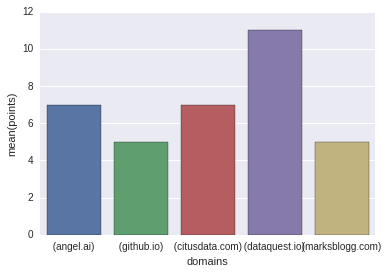

In [77]:
sns.barplot(x = 'domains', y = 'points', data = tau_df)